In [3]:
library("Seurat")

In [4]:
load("/data/severs/NeoLetExe_five_triplets.RData")

In [88]:
library("ggplot2")

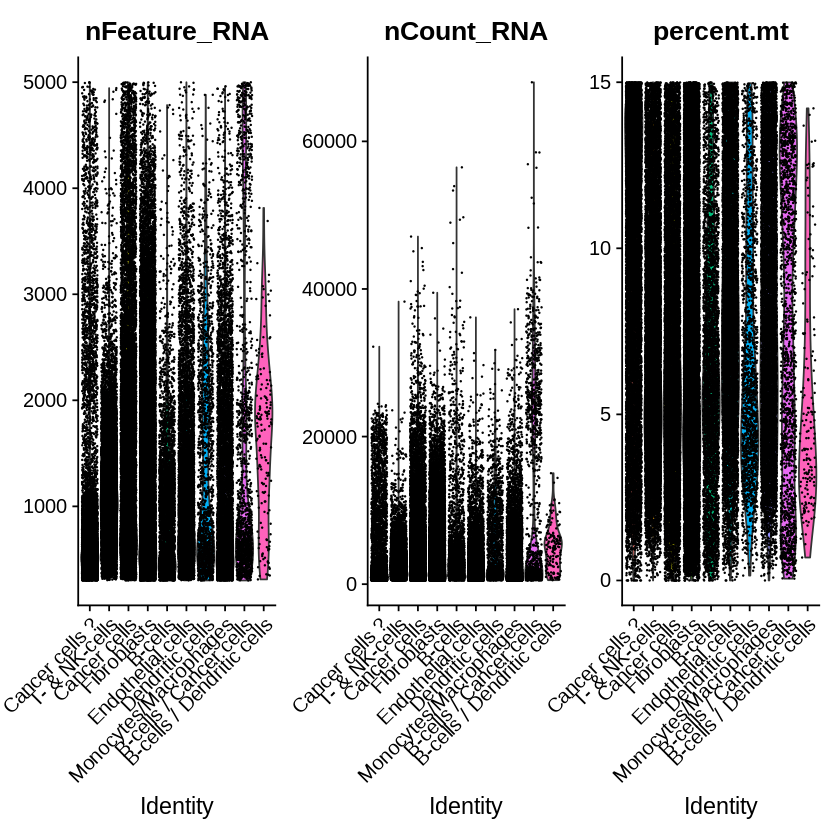

In [5]:
VlnPlot(Subset_Cells, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [6]:
Subset_Cells

An object of class Seurat 
33562 features across 94231 samples within 1 assay 
Active assay: RNA (33562 features, 0 variable features)
 2 dimensional reductions calculated: pca, umap

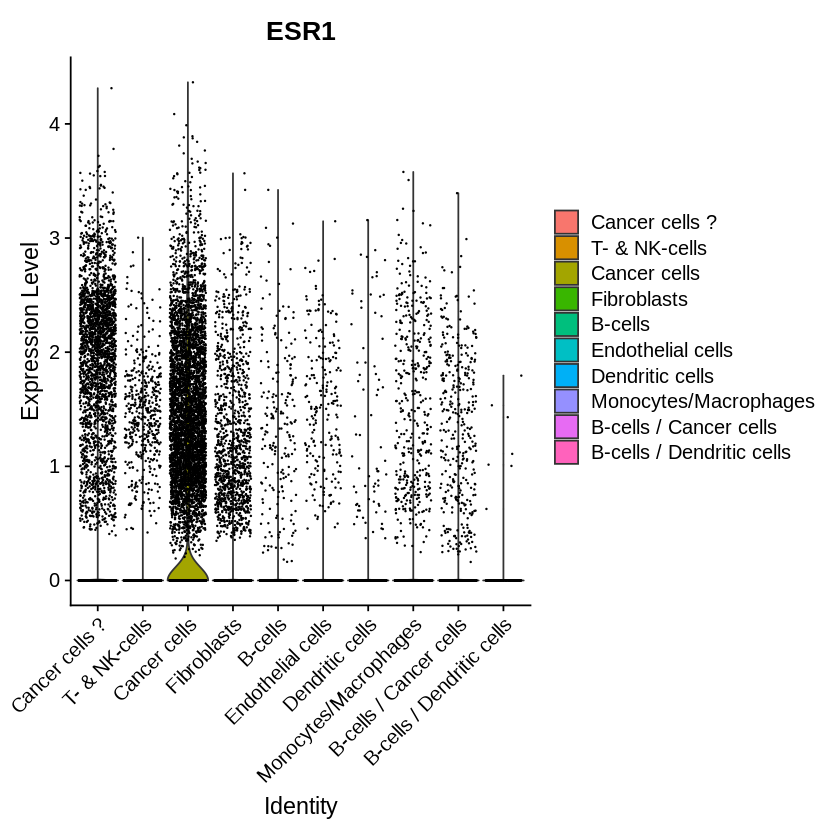

In [7]:
VlnPlot(object = Subset_Cells, features = c("ESR1"))

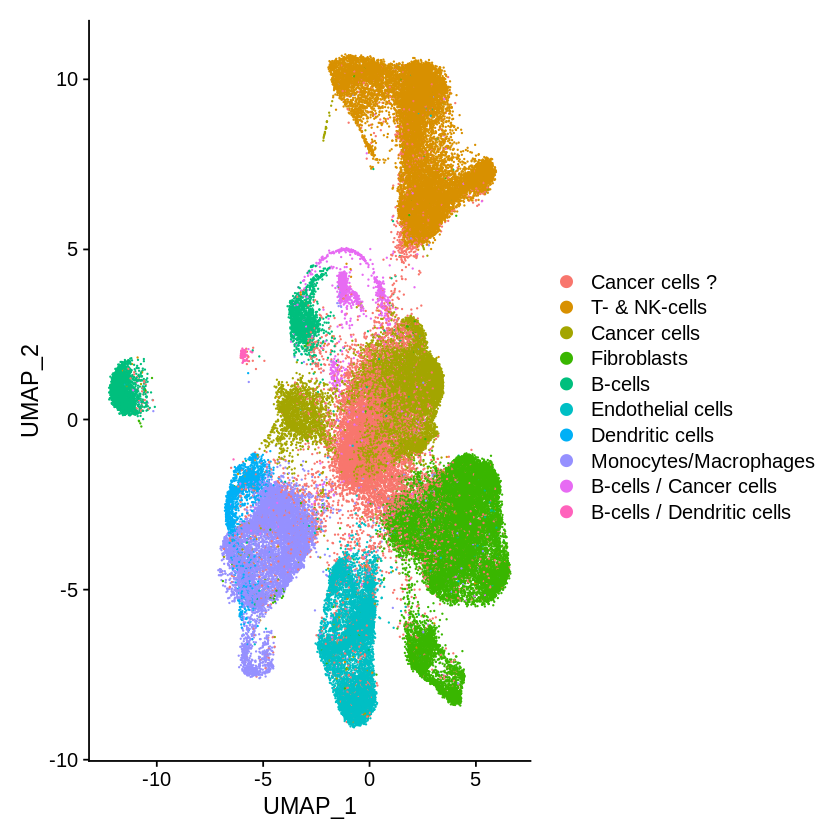

In [13]:
DimPlot(Subset_Cells)

In [6]:
meta_data <- data.frame(Subset_Cells@meta.data)

In [7]:
library("ggplot2")

In [43]:

DimPlot(Subset_Cells, dims=c(1,2), reduction = "umap",label=TRUE)

#ggsave("/home/severs/SingleCells/plots/umap.png", height = 7 , width = 7 * 2)

ERROR: Error in value[[3L]](cond): could not open file '/tmp/RtmpfhtqBk/file8a3d78f412ff.png'


plot without title

In [10]:
UMAP_coord <- as.data.frame(Subset_Cells[["umap"]]@cell.embeddings)

In [11]:
UMAP_coord["patient_number"] <- meta_data["patient_number"]

In [12]:
meta_data["UMAP_1"] <- UMAP_coord["UMAP_1"]
meta_data["UMAP_2"] <- UMAP_coord["UMAP_2"]

In [15]:
write.csv(meta_data, "/data/severs/NeoLet_metadata.csv", row.names=TRUE)

In [6]:
cancer_cells <- ifelse(Subset_Cells@meta.data["main.ids"] == "Cancer cells" |Subset_Cells@meta.data["main.ids"] == "Cancer cells", 1, 0 )

## Metadata old

In [16]:
load("/data/xiaoral/rna_metadata.Rdata")

# Lasso regression on old dataset

In [8]:
rna_old <- read.csv(file = '/data/severs/clean_cancer_old.csv')

In [13]:
rownames(rna_old) <- rna_old$X

In [14]:
rna_old$X <- NULL

In [18]:
Y = rna_old$ESR1

In [23]:
X = rna_old[, -match("ESR1", colnames(rna_old))]

In [33]:
X_train <- as.matrix(X)

In [49]:
lambdas <- 10^seq (0, -3, by = -.1)

In [ ]:
library(glmnet)
library(doMC)

In [147]:
registerDoMC(cores = 20)

In [146]:
cv_ridge  <- cv.glmnet(scale(X_train) , Y, nfolds = 5, alpha = 1, lambda = lambdas , type.measure = "deviance", parallel=TRUE)

In [55]:
prediction <- predict(cv_ridge, newx=X_train)

In [82]:
pred <- data.frame(list(prediction, Y))

In [83]:
colnames(pred) <- c("prediction", "truth")

In [87]:
pred <- pred[order(pred$truth),]

In [109]:
paste("R2: ", toString(score))

[1] "R2:  0.37665468168245"

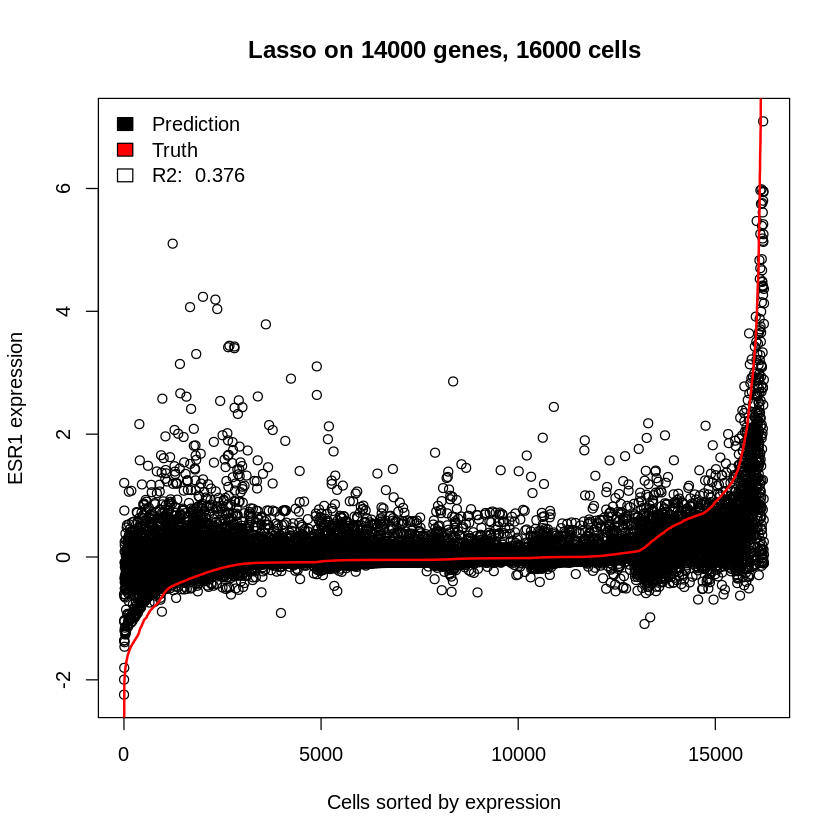

In [123]:
plot(pred$prediction, pch=1, ylab="ESR1 expression", xlab="Cells sorted by expression")
lines(pred$truth, col="red", lw=2)
legend("topleft", legend=c("Prediction", "Truth", paste("R2: ", substr(toString(score), 1, 5))), bty = "n" ,fill=c("black","red", "white"))
title("Lasso on 14000 genes, 16000 cells")

In [75]:
rsq <- function (x, y) cor(x, y) ^ 2

In [80]:
score <- rsq(Y, prediction)

In [155]:
sum(as.numeric(coef(cv_ridge))>0)

[1] 60

In [156]:
ncol(X)

[1] 14297

In [159]:
pdf("lasso_oldset_lambdas.pdf")
plot(cv_ridge)
dev.off()

png 
  2

In [143]:
lasso.mod <- glmnet(scale(X_train), Y, alpha=1,  parallel=TRUE)

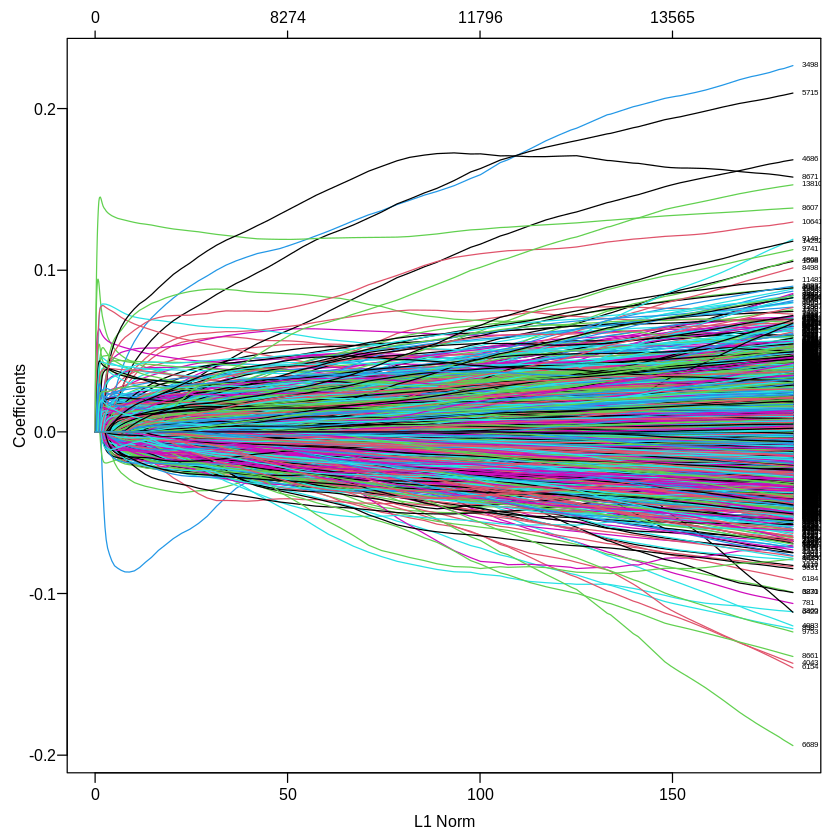

In [144]:
par(mfrow = c(1,1), mar = c(3.5,3.5,2,1), mgp = c(2, 0.6, 0), cex = 0.8, las = 1)
plot(lasso.mod, "norm", label = TRUE)